# 데이터 준비

In [78]:
# 모듈 임포트

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd

print('done')

done


In [2]:
# wine 불러와서 확인

wine = load_wine()

print(dir(wine))

wine.keys()

['DESCR', 'data', 'feature_names', 'target', 'target_names']


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
# feature 데이터와 lable 데이터를 변수에 저장 후 확인

wine_data = wine.data
wine_label = wine.target

print(wine_data.shape) 
print(wine_label.shape)
wine_label

(178, 13)
(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
# targer names 확인

wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
# 다른 데이터도 확인

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
# 판다스 데이터 프레임으로 변환

wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df

# data 에는 wine_data를 넣어주고 컬럼에는 feature_name으로 이름 붙임

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
# lable 컬럼 추가

wine_df["label"] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [79]:
# 트레이닝셋과 테스트셋 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=22,
                                                    stratify=wine_label)
# 테스트 데이터의 불균형 때문인지 SVM에서 경고를 뱉어서 균형을 맞춰줌 

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


In [9]:
# 트레인 데이터셋 확인

X_train.shape, y_train.shape

((142, 13), (142,))

In [10]:
# y 확인

y_train, y_test

(array([0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1,
        2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1,
        1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1,
        2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 2, 0,
        2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2,
        0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 2, 1, 2,
        1, 2, 2, 2, 0, 0, 0, 2, 1, 0]),
 array([0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 2, 1, 2,
        1, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 1, 1, 1]))

# Decision Tree

In [81]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier # 모델 임포트

decision_tree = DecisionTreeClassifier(random_state=22) # 변수에 모델 저장
decision_tree.fit(X_train, y_train) # 학습
y_pred = decision_tree.predict(X_test) # 변수에 결과 저장

accuracy = accuracy_score(y_test, y_pred) # 정확도 출력
print('[정확도]: {:.2f}'.format(accuracy*100) +'%')

[정확도]: 88.89%


In [82]:
# Confusion Matrix

print('[Confusion Matrix]')
print()
print(confusion_matrix(y_test, y_pred)) # 오차 행렬 출력

[Confusion Matrix]

[[10  2  0]
 [ 0 12  2]
 [ 0  0 10]]


In [83]:
# Classification report

print('[Classification report]')
print()
print(classification_report(y_test, y_pred)) # 분석 결과 출력

[Classification report]

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.86      0.86      0.86        14
           2       0.83      1.00      0.91        10

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.90      0.89      0.89        36



# Random Forest

In [84]:
# Randome Forest 

from sklearn.ensemble import RandomForestClassifier # 모델 임포트

random_forest = RandomForestClassifier(random_state=22) # 변수에 모델 저장
random_forest.fit(X_train, y_train) # 학습
y_pred = random_forest.predict(X_test) # 변수에 결과 저장

accuracy = accuracy_score(y_test, y_pred) # 정확도 출력
print('[정확도]: {:.2f}'.format(accuracy*100) +'%')

정확도: 94.44%


In [85]:
# Confusion Matrix

print('[Confusion Matrix]')
print()
print(confusion_matrix(y_test, y_pred)) # 오차 행렬 출력

[Confusion Matrix]

[[11  1  0]
 [ 0 13  1]
 [ 0  0 10]]


In [86]:
# Classification report

print('[Classification report]')
print()
print(classification_report(y_test, y_pred)) # 분석 결과 출력

[Classification report]

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      0.93      0.93        14
           2       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



# SVM model warning

라벨2 데이터를 하나도 맞추지 못해서 경고메세지가 뜸

TP가 0이라서 정밀도와 재현율이 0이 되어버림

해당 오류는 해당 항목에 맞는 데이터가 없어서 0을 채워넣었으니 경계하라는 뜻

테스트 세트의 라벨 비율을 조절해서 경고는 해결했지만 역시나 정확도가 망해버림

2를 만나면 그냥 1, 2 중에 하나를 찍고있다

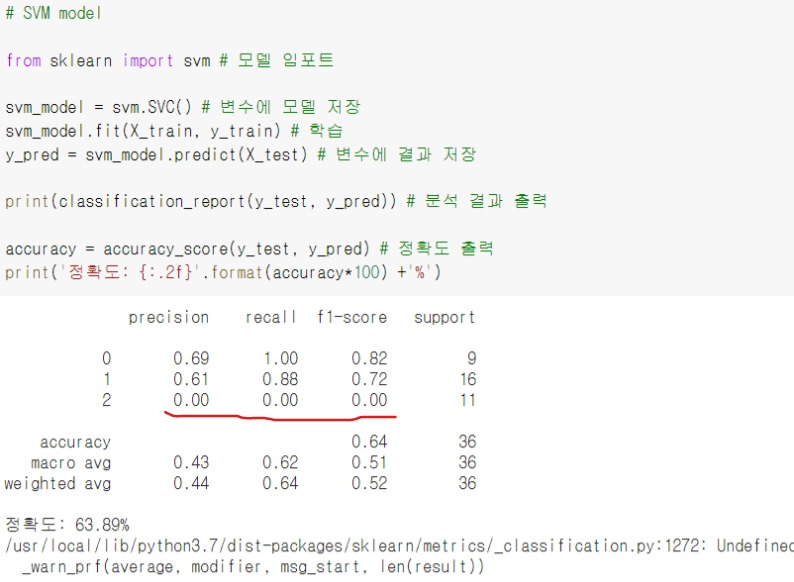

# SVM model

In [103]:
# SVM model

from sklearn import svm # 모델 임포트

svm_model = svm.SVC() # 변수에 모델 저장
svm_model.fit(X_train, y_train) # 학습
y_pred = svm_model.predict(X_test) # 변수에 결과 저장

accuracy = accuracy_score(y_test, y_pred) # 정확도 출력
print('[정확도]: {:.2f}'.format(accuracy*100) +'%')

[정확도]: 61.11%


In [90]:
# Classification report

print('[Classification report]')
print()
print(classification_report(y_test, y_pred)) # 분석 결과 출력

[Classification report]

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.64      0.64      0.64        14
           2       0.36      0.40      0.38        10

    accuracy                           0.61        36
   macro avg       0.61      0.60      0.60        36
weighted avg       0.62      0.61      0.62        36



In [104]:
# Confusion Matrix

print('[Confusion Matrix]')
print()
print(confusion_matrix(y_test, y_pred)) # 오차 행렬 출력

[Confusion Matrix]

[[9 0 3]
 [1 9 4]
 [1 5 4]]


# SGD Classifier Warning

위와 같은 경고 발생

여러번 시도해서 경고가 안 뜨는 경우로 맞춰놓긴 하였으나

lable2가 판단하기 어려운 항목인 것 같다

5개의 모델 중 이거만 시도할때마다 결과가 달라지는데

2를 한번도 선언하지 않기도 하는 경우가 잦고

이 경우에는 죄다 2라고 주장하고 있다

어느 경우든 정확도는 처참한 수준.

precision이 1.0이 나온건 0과 1은 진짜 확실한 것만 맞춘거고

recall이 1.0이 나온건 애매한건 다 2라고 해버리니 2는 절대 틀릴일이 없는 것.

즉 이 모델은 제대로 동작하지 않는다.

# SGD Classifier

In [231]:
# SGD Classifier

from sklearn.linear_model import SGDClassifier # 모델 임포트

sgd_model = SGDClassifier() # 변수에 모델 저장
sgd_model.fit(X_train,y_train) # 학습
y_pred = sgd_model.predict(X_test) # 변수에 결과 저장

accuracy = accuracy_score(y_test, y_pred) # 정확도 출력
print('[정확도]: {:.2f}'.format(accuracy*100) +'%')

[정확도]: 41.67%


In [232]:
# Confusion Matrix

print('[Confusion Matrix]')
print()
print(confusion_matrix(y_test, y_pred)) # 오차 행렬 출력

[Confusion Matrix]

[[ 4  0  8]
 [ 0  1 13]
 [ 0  0 10]]


In [233]:
# Classification report

print('[Classification report]')
print()
print(classification_report(y_test, y_pred)) # 분석 결과 출력

[Classification report]

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       1.00      0.07      0.13        14
           2       0.32      1.00      0.49        10

    accuracy                           0.42        36
   macro avg       0.77      0.47      0.37        36
weighted avg       0.81      0.42      0.35        36



# Logistic Regression Warning

digits 분석에서 나오던 경고와 동일

max_iter 를 증가시켜서 해결했는데

digits 의 경우와 달리 정확도가 올라갔다..?

# Logistic Regression

In [238]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression # 모델 임포트

logistic_model = LogisticRegression(max_iter=2500) # 변수에 모델 저장
logistic_model.fit(X_train,y_train) # 학습
y_pred = logistic_model.predict(X_test) # 변수에 결과 저장

accuracy = accuracy_score(y_test, y_pred) # 정확도 출력
print('[정확도]: {:.2f}'.format(accuracy*100) +'%')

[정확도]: 91.67%


In [235]:
# Confusion Matrix

print('[Confusion Matrix]')
print()
print(confusion_matrix(y_test, y_pred)) # 오차 행렬 출력

[Confusion Matrix]

[[11  1  0]
 [ 0 13  1]
 [ 0  1  9]]


In [236]:
# Classification report

print('[Classification report]')
print()
print(classification_report(y_test, y_pred)) # 분석 결과 출력

[Classification report]

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.87      0.93      0.90        14
           2       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



# 결론

SVM와 SGD의 로직이 어떻게 되는지는 모르겠지만

고르게 성적이 좋았던 digit 분석과 다르게 이번에는 대놓고 상태가 안좋은 케이스가 있다.

학습 데이터량이 적어서 그런건지

아니면 해당 모델로 분류하기 적당하지 않은 데이터라서 그런건지는 모르겠지만

둘 다 이번 실험은 탈락.

정확도가 높은 random forest와 rogistic regression 중에서 고르자면

random forest가 조금 더 나을 것 같다

rogistic regression는 반복 연산 횟수를 늘려주면서 테스트 시간이 조금 오래 걸린 느낌이라서.